# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club



LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.



In [3]:
#First import pandas library for data manipulation

import pandas as pd

In [4]:
#We have information about each column in the data set in the data_info.csv file
data_info = pd.read_csv('lending_club_info.csv',index_col = 'LoanStatNew')

In [8]:
#Have a look at the data!
pd.DataFrame(data_info)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [10]:
#looking into the description of a particular row
data_info.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [11]:
#Defining a function to get the description of a particular row
def feature_info(row_name):
    print(data_info.loc[row_name]['Description'])

In [12]:
#Checking the function now
feature_info('mort_acc')

Number of mortgage accounts.


In [13]:
#importing other libraries for data analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#why use matplotlib inline?
#It is a magic command that sets the backend of matplotlib to the 'inline' backend,
#  which means plotting right after the code
%matplotlib inline

In [14]:
#Now we will load the data set
df = pd.read_csv('lending_club_loan_two.csv')

In [15]:
#There is no harm in finding its information!
df.info()
#Description of the data set
#The data set has 396030 rows and 27 columns
#The data set has 396030 entries in total
#Anytime we have a missing value, we will have less than 396030 entries
#yes, we have missing values in the data set
#Where are the missing values?
#We can find the missing values by using the isnull() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [17]:
#Lets find the missing values
pd.DataFrame(df.isnull().sum(),columns=['Missing Values'])

,Missing Values
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [18]:
#lets describe the data a bit
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


Step 1 : Exploratory Data Analysis

#Which variable is important?
#Summary Statistics
#Visualize the data

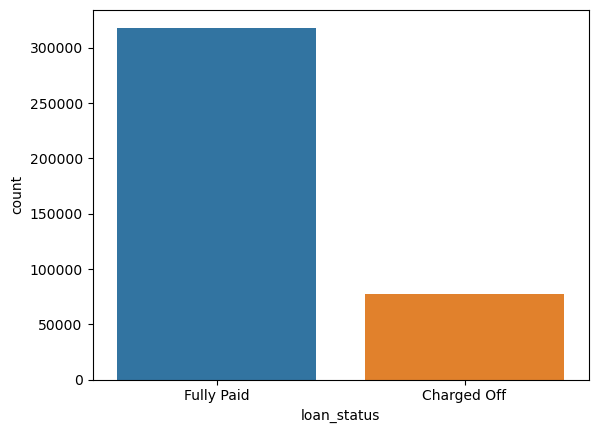

In [22]:
#We have to predict loan_status, so we create a countplot of the loan_status column

sns.countplot(x='loan_status',data=df,hue = 'loan_status')
plt.show()

In [28]:
#find proportion of the loan_status column
df.loan_status.value_counts(normalize = True)

#Looks like fully paid loans are 80% of the data set
#This shall help us in the future to decide on the model evaluation metric

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

In [29]:
#Lets have a look into the 
# loan_amnt column as it should be a good predictor

df.loan_amnt.head()

0    10000.0
1     8000.0
2    15600.0
3     7200.0
4    24375.0
Name: loan_amnt, dtype: float64

<Figure size 1200x800 with 0 Axes>

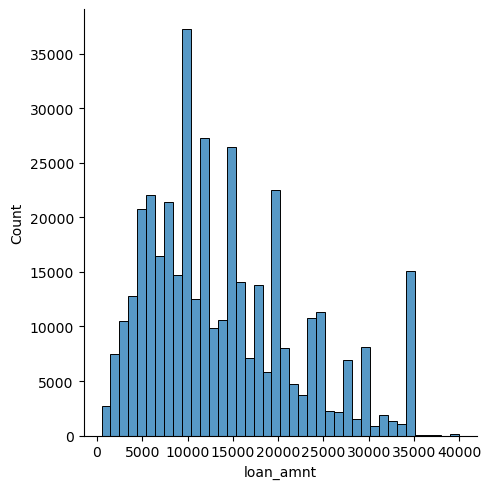

In [34]:
#Create a histogram of the loan_amnt column
#make it colorful and exciting!

plt.figure(figsize=(12,8))
sns.displot(df.loan_amnt,bins = 40,kde = False)
plt.show()

#Our observations:
#loan_amnt is a continuous variable
#loan_amnt is right skewed
#Most of the loans are around 10,000 to 20,000
#There are some outliers in the data set
#We can see that the loan_amnt is a good predictor
#Its median is around 13,000

In [35]:
#What are the continuous variables in the data set?
#We can find it by looking into the data_info.csv file
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [36]:
#An easy way to find the continuous variables is to find the unique values in the columns
df.emp_length.unique()
#This shows that emp_length is a categorical variable

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [37]:
#Explore correlation between the continuous variables using pearson correlation
#.corr() gives the correlation between the continuous variables by pearson correlation

df.corr(numeric_only=True) #only for continuous variables, not categorical variables

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


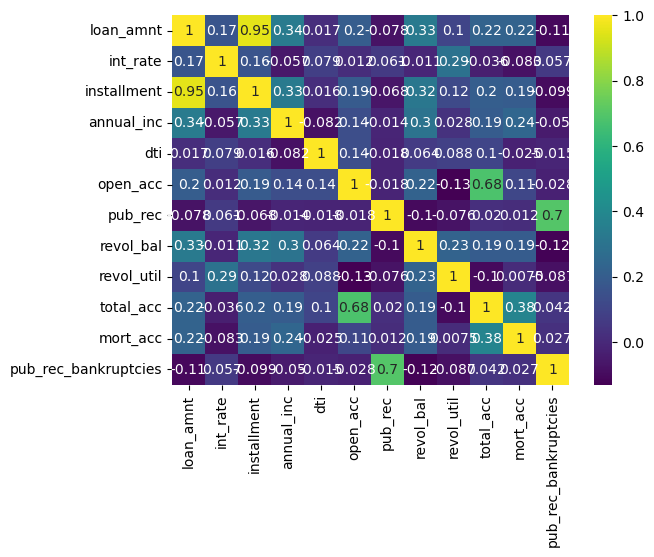

In [48]:
#lets visualise thuis correlation using a heatmap

sns.heatmap(df.corr(numeric_only=True),annot = True,cmap = 'viridis') #annot = True to show the values, cmap = 'viridis' for color
plt.Figure(figsize=(10,5))
plt.show()



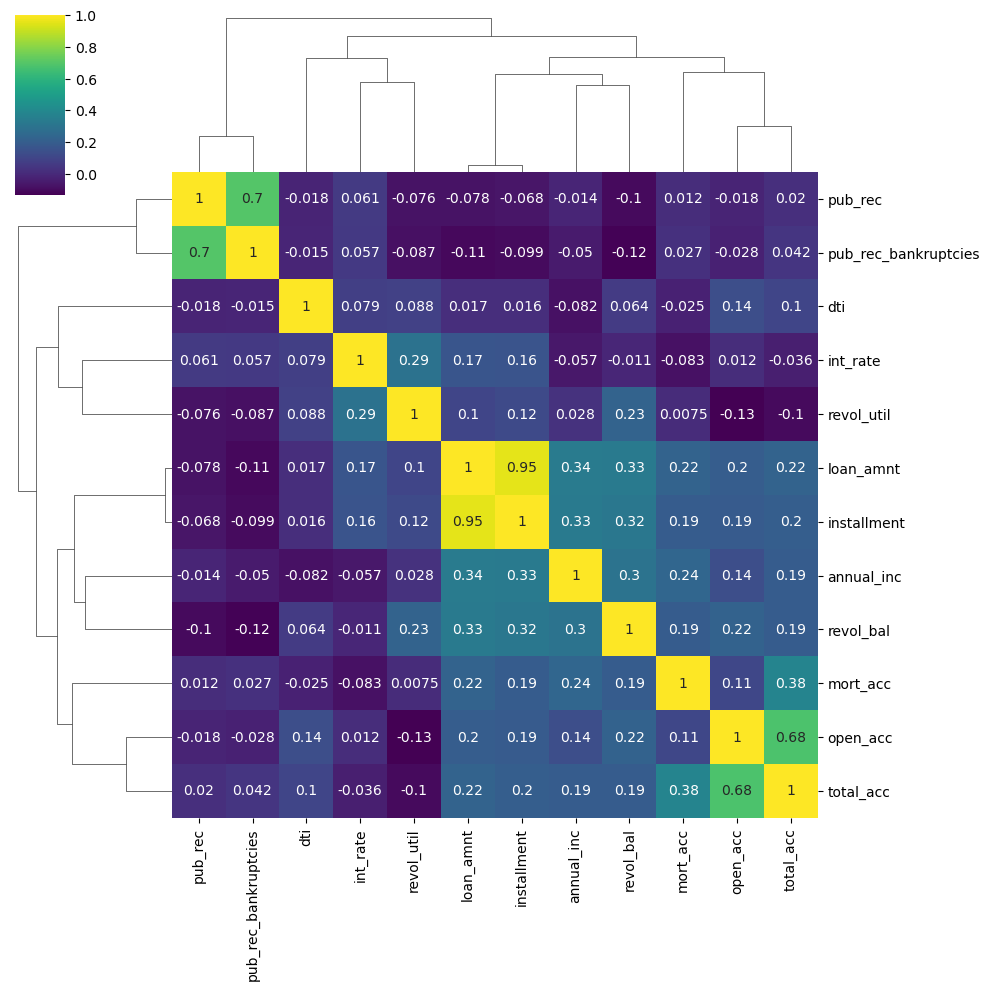

In [42]:
#can we have a clearer view of the heatmap?
#We can use the clustermap for that
sns.clustermap(df.corr(numeric_only=True),annot = True,cmap = 'viridis')
plt.show()
#What to notice here?
#We can see that there is a strong correlation between the installment and the 
# loan_amnt with correlation value of 0.95
#This is because the loan_amnt is the amount of the loan and the installment is the monthly payment
#We can also see a strong correlation between the pub_rec and pub_rec_bankruptcies
#This is because pub_rec_bankruptcies is the number of public record bankruptcies
#pub_rec is the number of derogatory public records
#We can also see a strong correlation between the total_acc and open_acc
#This is because total_acc is the total number of credit lines
#open_acc is the number of open credit lines in the borrower's credit file
#We can also see a strong correlation between the loan_amnt and the annual_inc ,value of correlation is 0.33
#This is because the annual_inc is the annual income of the borrower
#We can also see a strong correlation between the loan_amnt and the revol_bal ,value of correlation is 0.33
#Well I think enough of analuzing the correlation, lets move on to the next step

In [43]:
#Could I reduce the independent variables?
#Yes, we can reduce the independent variables by removing the highly correlated variables
#Can we use Principal Component Analysis?
#Yes, we can use Principal Component Analysis to reduce the independent variables
#We will try to reduce the independent variables in the future
#First lets do it without reducing the independent variables

In [50]:
#There is almost perfect correlation between the loan_amnt and the installment
data_info.loc['installment']['Description']

# So , Installment is the monthly payment owed by the borrower if the loan originates

'The monthly payment owed by the borrower if the loan originates.'

In [51]:
#Whats loan_amnt?
data_info.loc['loan_amnt']['Description']

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

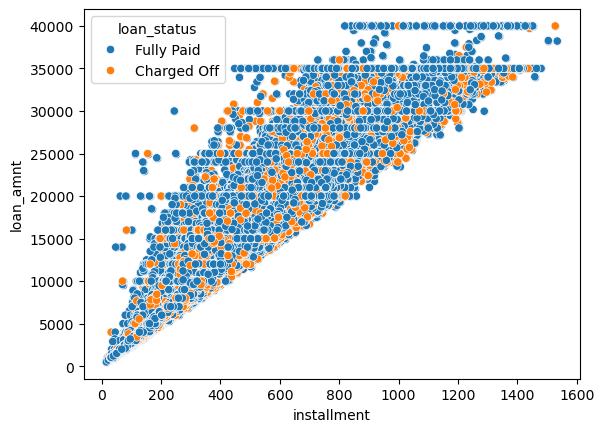

In [ ]:
#Plot scatter plot between the loan_amnt and the installment
#  to see the correlation

sns.scatterplot(x='installment',y='loan_amnt',data=df, hue = 'loan_status')
plt.show()

#What do we observe in it from the hue?
#We can see that the fully paid loans are more in number
#We can see that the charged off loans are less in number
#We can see that the charged off loans are more in number for the higher loan amounts
#We can see that the fully paid loans are more in number for the lower loan amounts


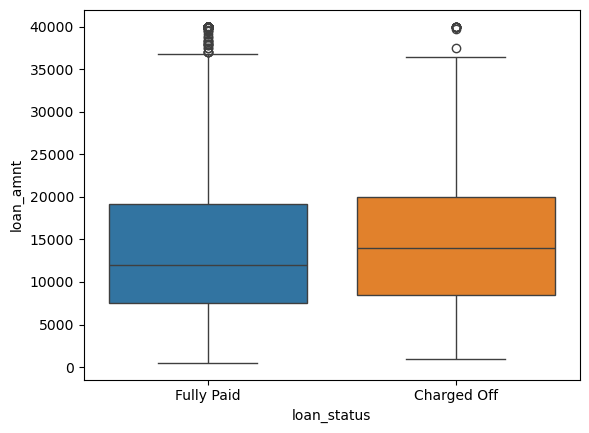

In [56]:
#Lets create a boxplot between the loan_status and the loan_amnt
#What does a boxplot show?
#A boxplot shows the distribution of the data and the outliers in the data
#  and the median of the data

sns.boxplot(x= 'loan_status',y='loan_amnt',data=df,hue = 'loan_status')
plt.show()

#What do we observe from boxplot here?
#We can see that the charged off loans have higher loan amounts 
# because the median is higher
#The fully paid loans have outliers in the loan amounts like 35,000, 40,000
#The charged off loans have outliers in the loan amounts like 35,000, 40,000


In [58]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [59]:
#Exploring Grade column
df['grade']

0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 396030, dtype: object

In [64]:
#Unique values in grade

print(df['grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [65]:
#Unique values in subgrades
print(df['sub_grade'].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [ ]:
#What is grade and subgrade, describe it?
#